예:서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,기타 중 한곳 입력
살고있는 지역을 입력해주세요 :서울
서울은(는) 범죄로부터 비교적 위험한 지역입니다


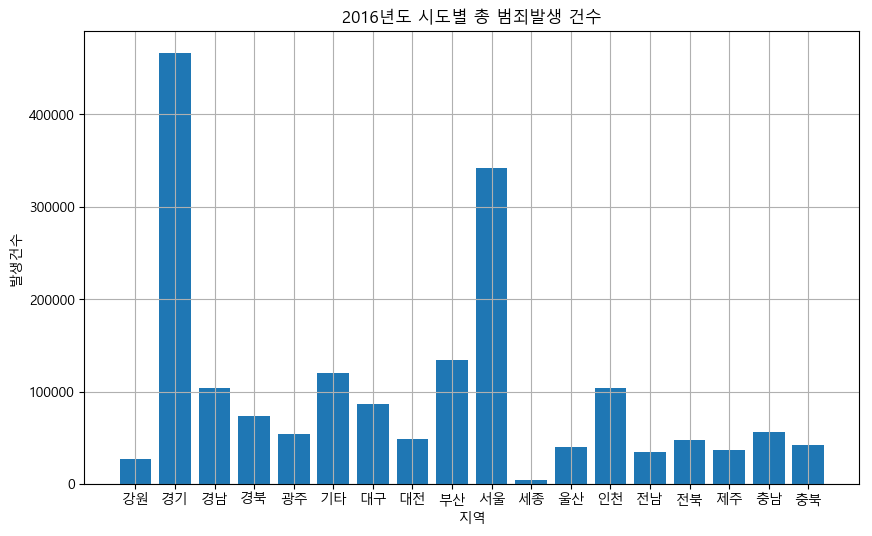

In [2]:
#우리 지역이 안전한 지역인지, 각 지역별 범죄 발생건수 그래프 만드는 파이썬
import csv
f=open('범죄발생지_2016년_시도별합계데이터.csv')
csv_data=csv.reader(f)
crime_area = []
crime_count = []
first_line = 1
total_sum = 0
count = 0
for line in csv_data:
    for data in line:
        if first_line:
            crime_area.append(data)
        else:
            crime_count.append(int(data))
            total_sum += int(data)
            count += 1
    first_line = 0    
f.close()

average = total_sum / count

loop = True
while loop:
    print("예:서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,기타 중 한곳 입력")
    in_area = input('살고있는 지역을 입력해주세요 :')
    if in_area in crime_area:
        loop = False

    if loop:
        print("잘못 입력하셨습니다. 다시 입력해 주세요.")
    else:
        i = crime_area.index(in_area)
        if crime_count[i] >= average:
            print(in_area+"은(는) 범죄로부터 비교적 위험한 지역입니다")
        else:
            print(in_area+"은(는) 범죄로부터 비교적 안전한 지역입니다")

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6), dpi=100)
plt.rc('font', family = 'Malgun Gothic')
plt.bar(crime_area,crime_count)
plt.title('2016년도 시도별 총 범죄발생 건수')
plt.xlabel('지역')
plt.ylabel('발생건수')
plt.grid()
plt.show()


예:서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,기타 중 한곳 입력
살고있는 지역을 입력해주세요. : 서울
예:강력범죄, 절도범죄, 폭력범죄, 지능범죄, 풍속범죄, 특별경제범죄, 마약범죄, 보건범죄, 환경범죄, 교통범죄, 노동범죄, 안보범죄, 선거범죄, 병역범죄, 기타범죄
어떤 범죄에 대해서 알고 싶나요? 선거범죄
서울 지역의 선거범죄 발생건수는  180 건 입니다.


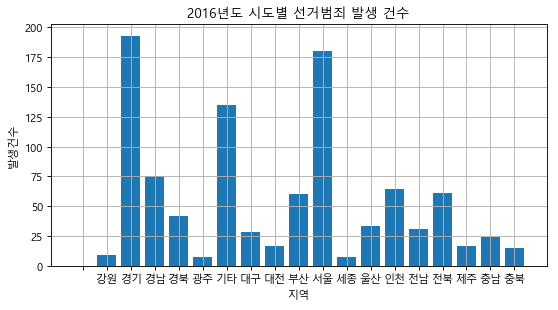

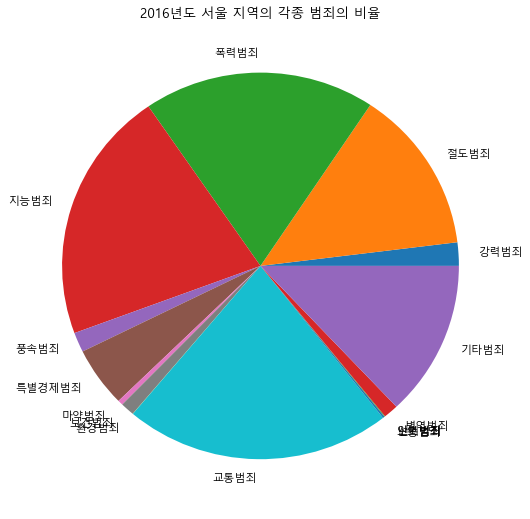

In [24]:
#내가 사는 지역의 범죄 종류별로 범죄 수를 알려주고, 그 지역의 범죄의 비율을 알려주는 원그래프
import csv
f=open('범죄발생지_2016년_주요도시1.csv')
data = csv.reader(f)

crime_name = ['강력범죄', '절도범죄', '폭력범죄', '지능범죄', '풍속범죄', '특별경제범죄', '마약범죄','보건범죄', '환경범죄','교통범죄','노동범죄','안보범죄','선거범죄','병역범죄','기타범죄']
result = []
crime_list = []
crime_area = []
crime_unit = []

for row in data :
    for sido in row:
        crime_area.append(sido)
        crime_unit.append(int(0)) #시도별 단위범죄를 저장하기위한 리스트 초기화
    break

crime_area[0] = ""
crime_area[1] = ""
    
loop = True
area_pos = 0
while loop:
    print("예:서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,기타 중 한곳 입력")
    in_area=input('살고있는 지역을 입력해주세요. : ')
    if in_area in crime_area :
        loop = False
    if loop:
        print("잘못 입력하셨습니다. 다시 입력해 주세요.")
    else:
        area_pos = crime_area.index(in_area)

loop = True
crime_pos = 0
while loop:
    print("예:강력범죄, 절도범죄, 폭력범죄, 지능범죄, 풍속범죄, 특별경제범죄, 마약범죄, 보건범죄, 환경범죄, 교통범죄, 노동범죄, 안보범죄, 선거범죄, 병역범죄, 기타범죄")
    in_crime=input('어떤 범죄에 대해서 알고 싶나요? ')
    if in_crime in crime_name :
        loop = False
    if loop:
        print("잘못 입력하셨습니다. 다시 입력해 주세요.")
    else:
        crime_pos = crime_name.index(in_crime)

for row in data :
    if row[0] in crime_name :
        if row[0] == in_crime  :
            for k in range(2,20):
                crime_unit[k] += int(row[k])

        sig = int(row[area_pos])

        if row[0] in crime_list :
            i = crime_list.index(row[0])
            result[i] += sig
        else : 
            crime_list.append(row[0])
            result.append(sig)   

print(in_area+" 지역의 "+in_crime+" 발생건수는 ", int(result[crime_pos]), "건 입니다.")

import matplotlib.pyplot as plt
plt.figure(figsize=(8,4), dpi=80)
plt.bar(crime_area,crime_unit)
plt.title('2016년도 시도별 '+in_crime+' 발생 건수')
plt.xlabel('지역')
plt.ylabel('발생건수')
plt.grid()
plt.show()

plt.figure(figsize=(8,8), dpi=80)
plt.rc('font', family= 'Malgun Gothic')
plt.title('2016년도 '+in_area+' 지역의 각종 범죄의 비율')
plt.pie(result, labels=crime_list)
plt.show()